In [ ]:
# problem statement
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
 
The goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
 
 
from sklearn.tree import DecisionTreeClassifier
 
from IPython.display import Image 
from sklearn import tree 
from os import system 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
 
from sklearn.tree import export_graphviz #for exporting dot data
from sklearn.externals.six import StringIO  #for stringIO
from IPython.display import Image  #for including image
import pydotplus #for dot data
import graphviz #for visualizing decision tree
from statistics import median,mean
 
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score 
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score
 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
DataFrame = pd.read_csv('bank-full.csv')
DataFrame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
DataFrame.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Exploratory data analysis

In [5]:
print('\033[1m''Number of rows in dataframe',DataFrame.shape[0]) #'\033[1m' - Bold
print('\033[1m''Number of features in dataframe',DataFrame.shape[1])

Number of rows in dataframe 45211
Number of features in dataframe 17


Data type of each attribute

In [6]:
DataFrame.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


1)10 features have object datatype and 7 have int datatype

2)As per given data we know that 10 features are of category type,so lets convert the datatype of those features

In [7]:
 DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
DataFrame.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


After conversion of datatypes in above step
 
10 features have category datatype and 7 have int datatype

 Checking the presence of missing values

In [8]:
DataFrame.isnull().sum().to_frame('Presence of missing values').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Presence of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking columns which contain string data¶

In [9]:
DataFrame['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
DataFrame['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [11]:
DataFrame['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
DataFrame['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
DataFrame['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 5 point summary of numerical attribute

In [14]:
DataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
#'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
# More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
# Minimum balance is -8019 and maximum balance is 102127
# Minimum age is 18 years and maximum is 95 years

In [15]:
 DataFrame.loc[DataFrame['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


 Distribution of numerical columns.

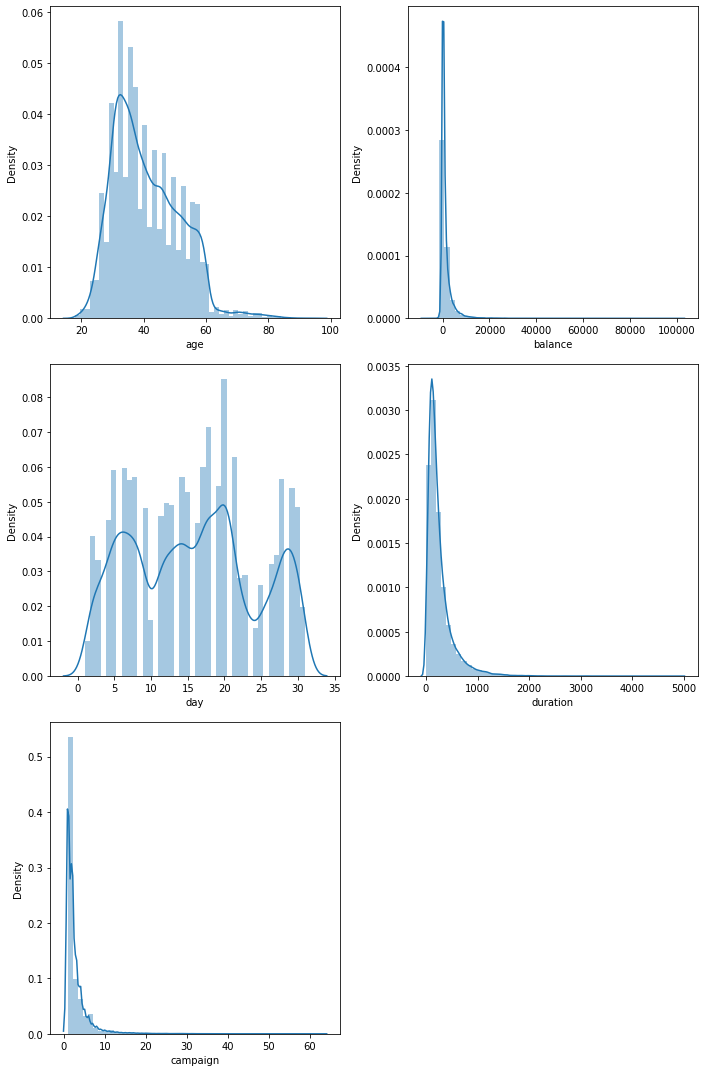

In [16]:
 fig, axe = plt.subplots(nrows=3, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() #to flatten subplot index positions
sns.distplot(DataFrame['age'],ax=axe[0]) 
sns.distplot(DataFrame['balance'],ax=axe[1]) 
sns.distplot(DataFrame['day'],ax=axe[2]) 
sns.distplot(DataFrame['duration'],ax=axe[3]) 
sns.distplot(DataFrame['campaign'],ax=axe[4]) 
 
 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)

 Distribution of categorical coloumn

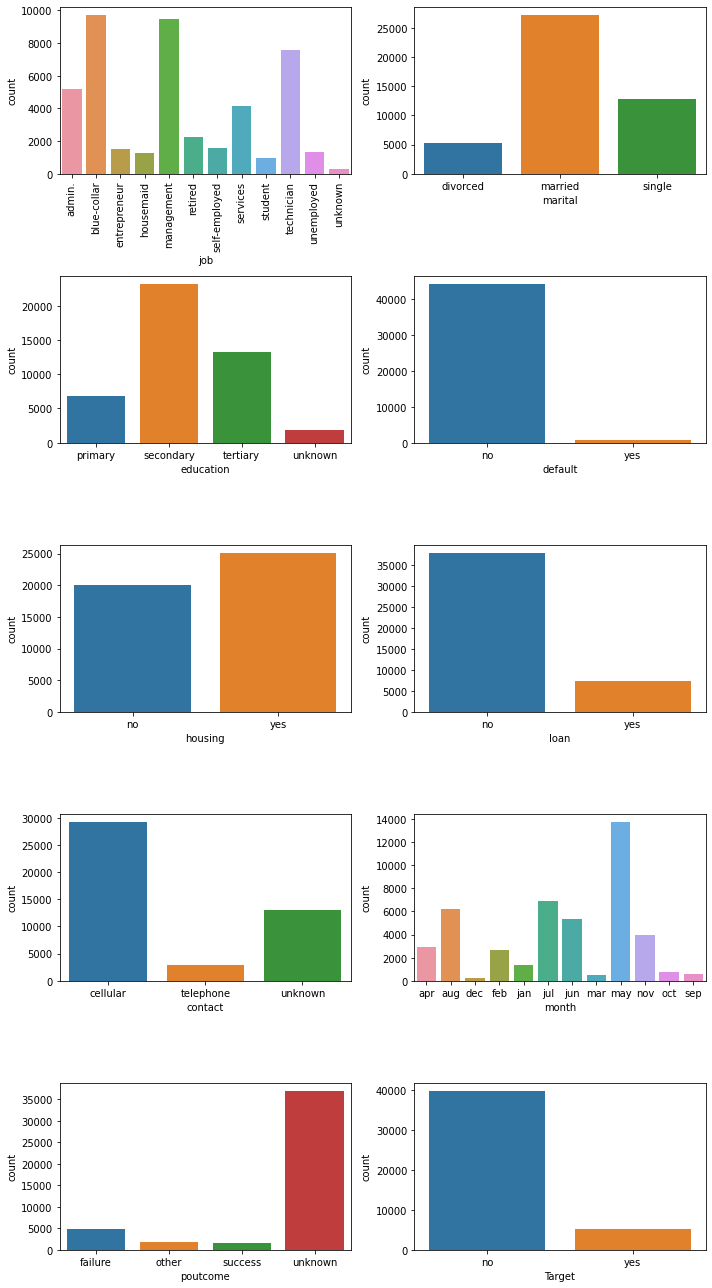

In [17]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sns.countplot(x=DataFrame['job'],data=DataFrame,ax=axe[0])  
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=DataFrame['marital'],data=DataFrame,ax=axe[1])
sns.countplot(x=DataFrame['education'],data=DataFrame,ax=axe[2])  
sns.countplot(x=DataFrame['default'],data=DataFrame,ax=axe[3])  
sns.countplot(x=DataFrame['housing'],data=DataFrame,ax=axe[4])  
sns.countplot(x=DataFrame['loan'],data=DataFrame,ax=axe[5]) 
sns.countplot(x=DataFrame['contact'],data=DataFrame,ax=axe[6]) 
sns.countplot(x=DataFrame['month'],data=DataFrame,ax=axe[7]) 
sns.countplot(x=DataFrame['poutcome'],data=DataFrame,ax=axe[8])  
sns.countplot(x=DataFrame['Target'],data=DataFrame,ax=axe[9])  
fig.tight_layout() #for arranging the plots
fig.show()

 #
More than 90% customers have no default credit
 
# Around 88% customers have not subscribed for term depositMost customers have been contacted 
 
# in mayMost customers have been contacted by cellular network(mobile phone)Number of customers who have housing loan is more than the number of customers who don't have housing loan
 
#
Around 6% customers have credit in default

 Measure of skewness of numerical columns¶

In [18]:
DataFrame.skew().to_frame('Skewness measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


 Checking the presence of outliers

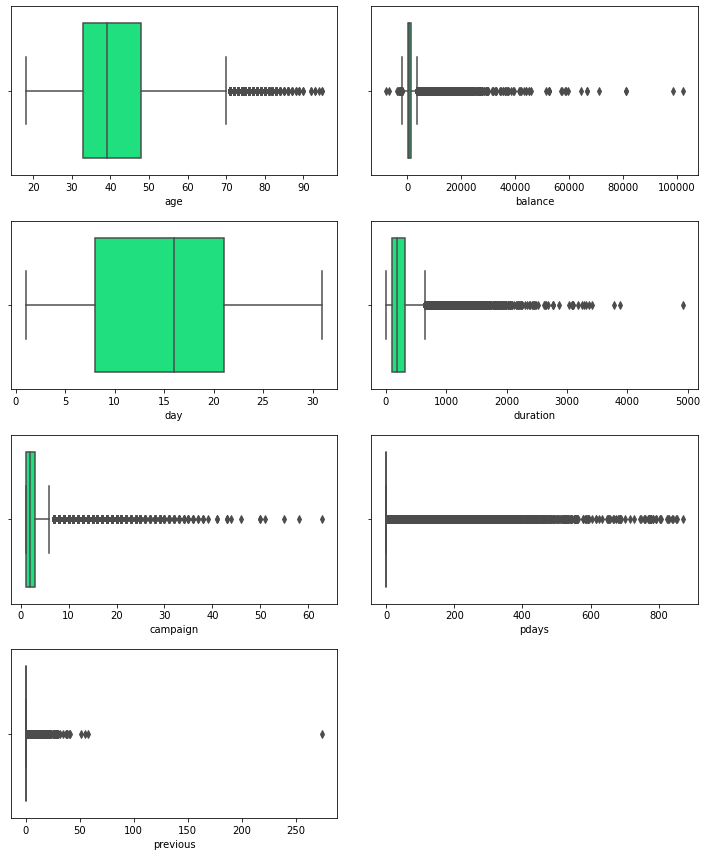

In [19]:
 fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=DataFrame,color='springgreen',ax=axe[0]) 
sns.boxplot(x='balance',data=DataFrame,color='springgreen',ax=axe[1])  
sns.boxplot(x='day',data=DataFrame,color='springgreen',ax=axe[2]) 
sns.boxplot(x='duration',data=DataFrame,color='springgreen',ax=axe[3])  
sns.boxplot(x='campaign',data=DataFrame,color='springgreen',ax=axe[4])  
sns.boxplot(x='pdays',data=DataFrame,color='springgreen',ax=axe[5]) 
sns.boxplot(x='previous',data=DataFrame,color='springgreen',ax=axe[6]) 
fig.tight_layout() #for arranging the plots
fig.show() 
axe.flat[-1].set_visible(False)

# Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
#Values less than 0 are present in 'Balance' column

 Distribution of Target column

In [20]:
DataFrame['Target'].value_counts().to_frame('Target column distriution')

,Target column distriution
no,39922
yes,5289


 From above values it can be stated that the dataset is imbalanced.

 Data preprocessing

 Label Encoding of variables

In [21]:
df_2 = DataFrame.copy() #making a copy of dataframe 'df_2'
encoder = LabelEncoder() #creating object of LabelEncoder 
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int)  
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int) #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int) #encoding 'loan' column and assigning 0 no and 1 yes values
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int) #encoding 'housing' column and assigning 0 no and 1 yes values
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int) #encoding 'target' column and assigning 0 no and 1 yes values
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


 Checking & modifying datatypes after Label Encoding

In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  Target     45211 non-null  int64   
dtypes: category(2), int64(15)
memory usage: 5.3 MB


In [23]:
#changing datatypes of attributes
df_2[['job','marital','education','default','housing','loan',
      'contact','month','poutcome','Target']] = df_2[['job',
      'marital','education','default','housing','loan','contact',
      'month','poutcome','Target']].apply(pd.Categorical)

In [24]:
 df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


Handeling Outliers with mean replacement

Boxplots after handeling outliers


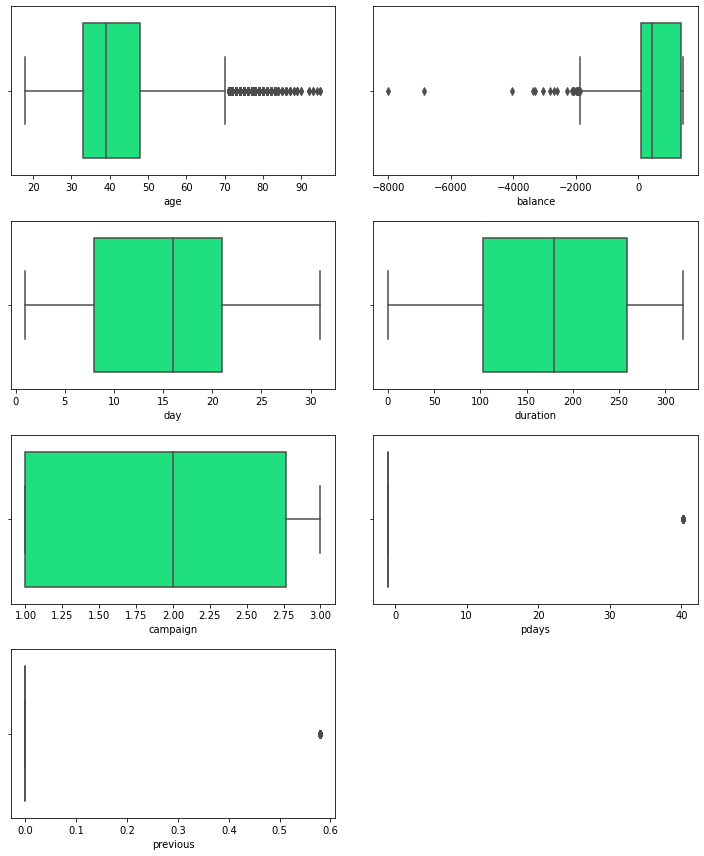

In [25]:
meanbal = float(df_2['balance'].mean()) #mean balance
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance']) #replacing with mean
 
meandur = float(df_2['duration'].mean()) #mean duration
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])#replacing with mean
 
meancam = float(df_2['campaign'].mean()) #mean campaign
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])#replacing with mean
 
meanpd = float(df_2['pdays'].mean()) #mean pdays
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])#replacing with mean
 
meanpr = float(df_2['previous'].mean()) #mean previous
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])#replacing with mean
 
 
 
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df_2,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=df_2,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=df_2,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=df_2,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=df_2,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=df_2,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')

 ## Outliers in 'age' column are not handled because it is a specific value for each record.
##After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

Corr plot of all features

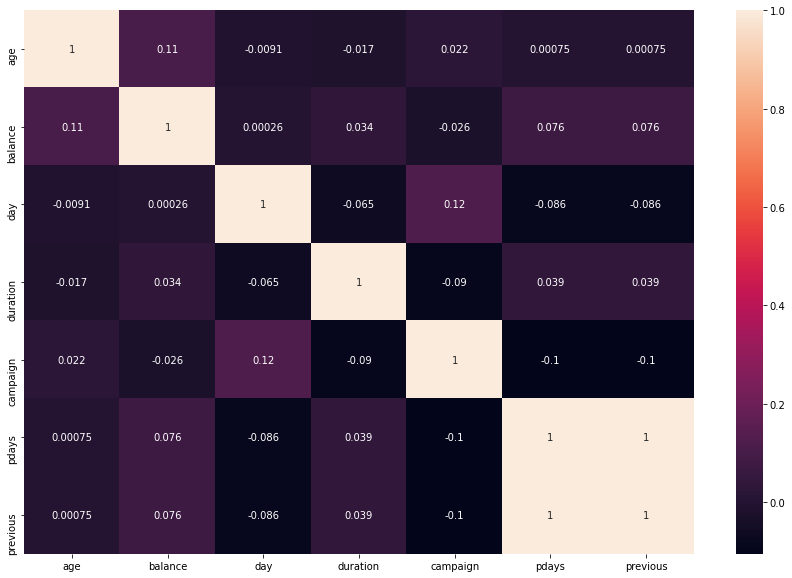

In [26]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df_2.corr(),annot=True);

Removing columns
#'job','education' and 'contact' attributes contain multiple unknown values.
#As they are specific string values and not numerical so cannot be treated with median, mean replacement
#As per data description, duration attribute is removed to have a realistic prediction.
'day' and 'month' of contact will not have any realtionship with customer opting for subscription
#'pdays' and 'previous' are highly correlated so removing any one from both of them.
#Even though 'poutcome' has a huge number of #'Unknown' values, it is kept because #'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [27]:
df_2 = df_2.drop(['job','education','contact','duration'
                  ,'pdays','day','month'],axis=1) 
df_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


 Pair plot features

In [ ]:
sns.pairplot(df_2);

Model building

Train test split

In [30]:
 
X = df_2.drop('Target',axis=1) #independent dimensions  
y = df_2['Target'] #selecting target column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

Scaling of coloumn

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

Models

Logistics regression

In [32]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled)

In [33]:
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11897   116]
 [ 1310   241]]
----------------------------------------
Accuracy of Logistic Regression :0.89
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


Naive bais

In [35]:
NB = GaussianNB()  
NB.fit(X_train_scaled,y_train) 
y_predi = NB.predict(X_test_scaled)

In [37]:
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('->'*50)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of Naive Bayes :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


 KNN

In [38]:
 knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled) #Predict 
 
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('->'*50)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


optimal k is 13


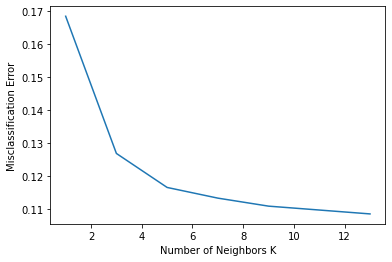

In [39]:
oddList = list(np.arange(1,15)) 
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) #Selecting only odd numbers from Range 1 to 24
 
accuracy_list = [] #Empty list to store accuracy scores of KNN models based on various K values
 
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) #Instantiate KNN with k=i
    knn.fit(X_train_scaled,y_train)  #Call the fit method of KNN to train the model or to learn the parameters of model
    y_pred = knn.predict(X_test_scaled) #Predict 
    accuracy_s = accuracy_score(y_test,y_pred) #for accuracy score
    accuracy_list.append(accuracy_s)  #for appedning accuracy score to accuracy score list
    
MSE=[1 - j for j in accuracy_list] #calculation of Mean Squared Error
 
optimal = neighbors[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
print('optimal k is',optimal) #Print optimal K value selected by minimum MSE
 
plt.plot(neighbors,MSE) #MSE plot 
plt.xlabel('Number of Neighbors K') #XLabel
plt.ylabel('Misclassification Error') #YLabel
plt.show() #display plot

SVC

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11867   146]
 [ 1273   278]]
------------------------------
Accuracy of SVC : 0.8953848422294308
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
